# Q-learning 

one training method for Q-learning in reinforcement learning.  

Q-learning algorithm is as follows,
1. initialize Q-table 
2. Choose an action 
3. perfom action
4. measure algorithm
5. update Q-table
  
Q-table is composed of state-space and action-space.   
but if Q-table is updated at first, Q-table often choose same behaviors, 
so that we employ epsilon greedy strategy.   
we set epsilon (100% at first ), and at each step ,decrease episilon (to 0.0005,0.05%).  
this epslon means the probability of not using Q-table. if not use Q-table, we randomly choose  actions.  
the expoloration-expoloitation trade-off explains the trade off between Q-table updating and the getting good scores.


the equation for update is 
\begin{equation}
    Q(s_t,a_t) = (1-\alpha)Q(s_t,a_t) + \alpha(r + \gamma max_aQ(s_{t+1},a))
\end{equation}
$ \alpha $ is learning rate, r is reward, $\gamma $ is discounted value for future reward.  

## Example, implementation of Q-learning 
<img src="q_learning_example.png" />
The robot can move up,right,down or left. 
Rewords are as followed below  
* power :+1
* bomb : -100
* end : +100 
* each time step : -1
* go outside of field : -100 and end. 

field size is 5×6 , but prepare 7×8 size of field. index is row is 0 to 6, column is 0 to 7   
state-space size is 5×6×6 ( start,blank,power,mined,end, out)

In [1]:
import pandas as pd
import numpy as np 
import random
from IPython.display import clear_output
import copy
import time 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"})

## create field 

In [3]:
# environment 
class env():
    def reset(self):
        power = [[1,4],[3,3],[3,6],[5,2]]
        bomb = [[2,2],[2,5],[4,1],[4,4]]
        end = [[5,5]]
        out = [[0,i] for  i in range(7)] + [[i,0] for i in range(1,6)] +  \
            [[i,7] for i in range(1,6)] + [[6,i] for i in range(7)]

        enviro = np.zeros((7,8))
        for p in power:
            enviro[p[0],p[1]] = 1
        for p in bomb:
            enviro[p[0],p[1]] = -100
        for p in end:
            enviro[p[0],p[1]] = 100
        for p in out:
            enviro[p[0],p[1]] = -1000
        self.enviro = enviro 
        
        self.epochs = 0
        self.tot_r = 0
        self.reward = 0
        self.state = [1,1]
        self.new_state = [1,1]
        self.done = False
        
    def action(self,act = 0):
        self.state = copy.deepcopy(self.new_state)
        if act == 0: # north
            self.new_state[0] += 1 
        if act == 1:  # east 
            self.new_state[1] += 1
        if act == 2:
            self.new_state[0] += -1
        if act == 3: 
            self.new_state[1] += -1 
            
        self.reward = self.enviro[self.new_state[0],self.new_state[1]]
        if self.new_state[0] == 5 and self.new_state[1] == 5:
            self.done = True
        if self.reward ==0 :
            self.reward = -1
        
        
    def action_rand(self):
        rand = random.uniform(0,1)
        for  i in range(n_act):
            if 1/n_act*i < rand and  rand < 1/n_act*(i+1):
                return(i)
            
    def run(self,plot=False):
        if plot:
            plt.xlim(0,8)
            plt.ylim(0,7)
        while not self.done:
            if random.uniform(0, 1) < epsilon:
                # Check the action space
                act = self.action_rand()
            else:
                # Check the learned values
                act = np.argmax(q_table[self.new_state[0],self.new_state[1]])

            self.action(act)
            old_value = q_table[self.state[0],self.state[1], act]
            next_max = np.max(q_table[self.new_state[0],self.new_state[1]])

            # Update the new value
            new_value = (1 - alpha) * old_value + alpha * \
                (self.reward + gamma * next_max)
            q_table[self.state[0],self.state[1],act] = new_value
            self.tot_r += self.reward
            
            self.epochs += 1
            
            if plot:
                plt.plot([self.state[1],self.new_state[1]],[self.state[0],self.new_state[0]])
            
            if self.epochs > 100:
                self.tot_r += -100
                break
            if self.reward == -1000:
                break
            

In [4]:
q_table = np.zeros((7,8,4))

# Hyperparameters
alpha = 0.1
gamma = 0.6

all_epochs = []
all_tot_r = []

n_act = 4 


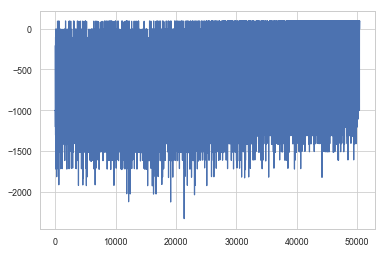

In [7]:
n_times = 1000
epsilon = 0.9
for i in range(n_times):
    plot = False
    epsilon += - 0.8999/n_times
    if i % 1000 ==0 :
        plot = True
    clear_output(wait=True)
    field = env()
    field.reset()
    field.run(plot=plot)
    if i% 1000 == 0:
        print(field.tot_r)
        print(field.epochs)
        plt.show()
        #time.sleep(1)
    all_tot_r.append(field.tot_r)
    all_epochs.append(field.epochs)
plt.plot(all_tot_r)

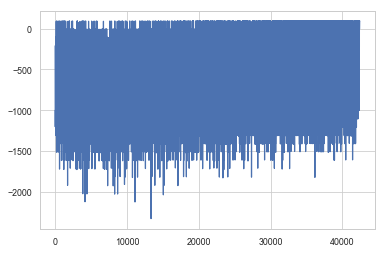

In [9]:

plt.plot(all_tot_r[8000:])

In [10]:
q_table[1]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 8.01344000e-01,  1.08934400e+00, -1.00000000e+03,
        -1.00000000e+03],
       [-9.59977600e+01,  3.48224000e+00, -1.00000000e+03,
        -3.46393600e-01],
       [ 6.67040000e+00,  7.47040000e+00, -1.00000000e+03,
         1.08934400e+00],
       [ 1.07840000e+01,  3.48224000e+00, -1.00000000e+03,
         3.48224000e+00],
       [-7.93600000e+01,  6.19040000e+00, -1.00000000e+03,
         7.47040000e+00],
       [ 1.19840000e+01, -9.99999990e+02, -9.99999889e+02,
         3.48223921e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

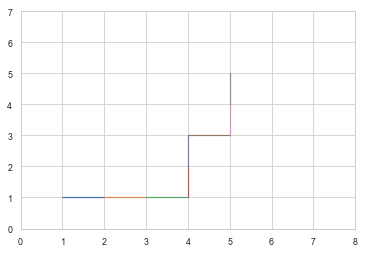

In [11]:
field = env()
field.reset()
field.run(plot=True)